# Question 1:
You are given a file called **Address.py** that defines the following class:

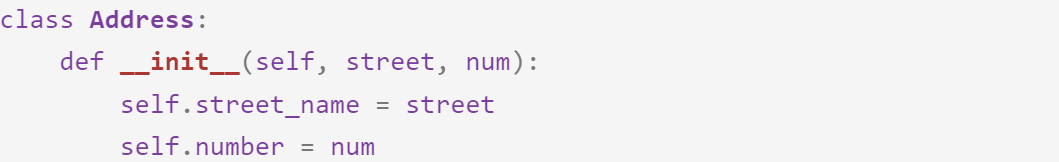

Your task is to make a subclass of the class **Address** called **CampusAddress** that has a new attribute, **office_number**, that can vary. This subclass will always have the **street** attribute set to **"Dai Co Viet"** and the **num** attribute set to **"01"**. 

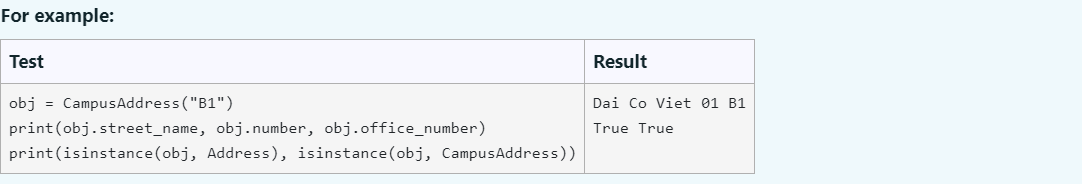

In [2]:
from Address import *
class CampusAddress(Address):
    def __init__(self, offnum):
        super().__init__(street="Dai Co Viet",num='01')
        self.office_number=offnum

        
obj = CampusAddress("B1")
print(obj.street_name, obj.number, obj.office_number)
print(isinstance(obj, Address), isinstance(obj, CampusAddress))

Dai Co Viet 01 B1
True True


# Question 2:
You are given a file namely **polygon.py** that defines the following class

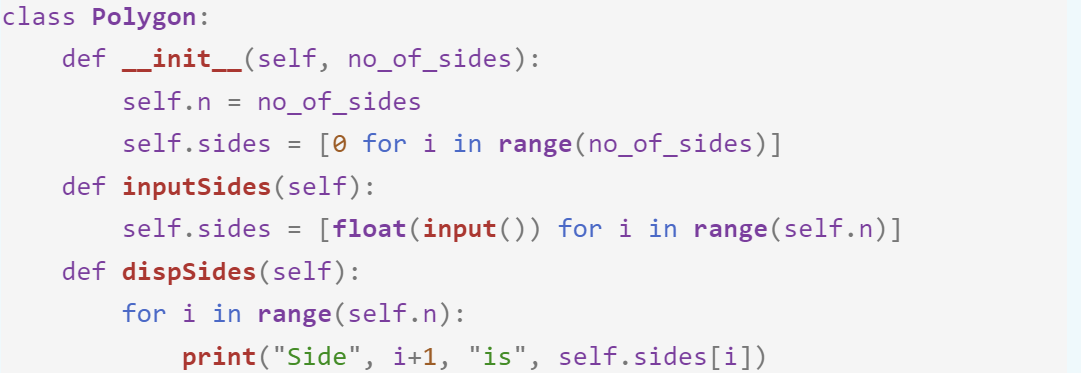

Your task is to make a child class **Triangle** and define the **findArea()** method to calculate the area of a triangle instance and print out the result up to two digits after the decimal point.

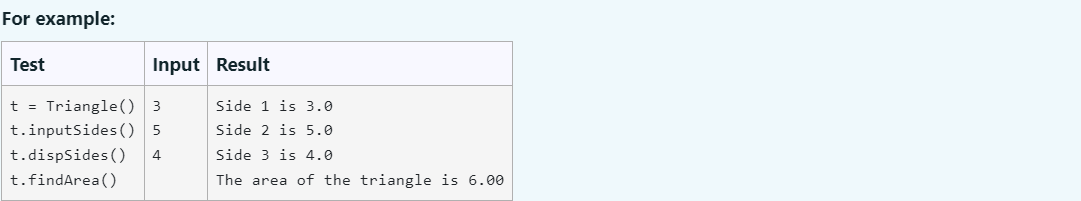

In [5]:
from Polygon import *
import math
class Triangle(Polygon):
    def __init__(self):
        super().__init__(no_of_sides=3)
    def inputSides(self):
        return super().inputSides()
    def dispSides(self):
        return super().dispSides()
    def findArea(self):
        a,b,c=self.sides
        temp=(a+b+c)/2
        res=math.sqrt(temp*(temp-a)*(temp-b)*(temp-c))
        print("The area of the triangle is {:.2f}".format(res))


t = Triangle()
t.inputSides()
t.dispSides()
t.findArea()


Side 1 is 3.0
Side 2 is 4.0
Side 3 is 5.0
The area of the triangle is 6.00


# Question 3:
 1. Create a **Vehicle** class with name, mileage and capacity instance attributes. You have to define:

 **\_\_init\_\_**: the class constructor

 **\_\_str\_\_**:  to show the information of a vehicle instance

 **fare()**: to calculate the fare charge of any vehicle, which is seating capacity * 100.

 2. Create a **Bus** child class that inherits from the Vehicle class. If Vehicle is Bus instance, we need to add an extra 10% on full fare as a maintenance charge. For this class, you have to define:

 **\_\_init\_\_**: the class constructor inherits from the parent class and has a default parameter capacity with the default value of 50.

 **\_\_str\_\_**: override to show the information of a bus instance

 **fare()**: override the method fare() of the parent class

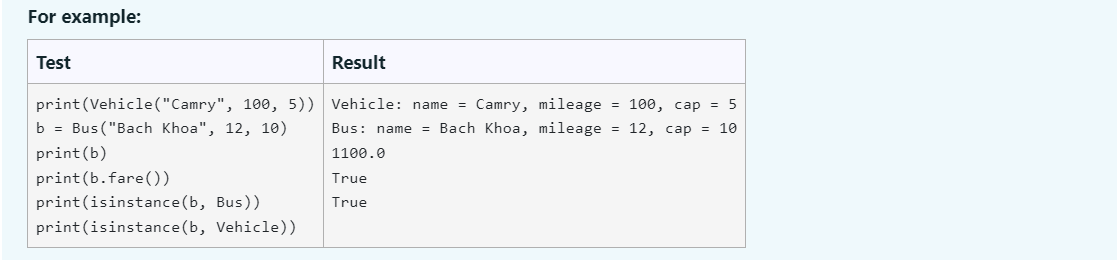

In [8]:
class Vehicle:
    def __init__(self,name,mileage,cap) :
        self.name=name
        self.mileage=mileage
        self.cap=cap
        self.type="Vehicle"
    def __str__(self) -> str:
        return '{}: name = {}, mileage = {}, cap = {}'.format(self.type,self.name,self.mileage,self.cap)
    def fare(self):
        return self.cap*100

class Bus(Vehicle):
    def __init__(self, name, mileage, cap=50):
        super().__init__(name, mileage, cap)
        self.type='Bus'
    def __str__(self) -> str:
        return super().__str__()
    def fare(self):
        return super().fare()+super().fare()/10    

print(Vehicle("Camry", 100, 5))
b = Bus("Bach Khoa", 12, 10)
print(b)
print(b.fare())
print(isinstance(b, Bus))
print(isinstance(b, Vehicle))

Vehicle: name = Camry, mileage = 100, cap = 5
Bus: name = Bach Khoa, mileage = 12, cap = 10
1100.0
True
True


# Question 4:
For a given function, the analytical expressions for the first and second derivatives must be manually coded. However, we could think of inheriting general functions for computing these derivatives numerically, such that the only thing we must always implement is the function itself. To realize this idea, we create a superclass, which is available in a file namely **Derivatives.py**:

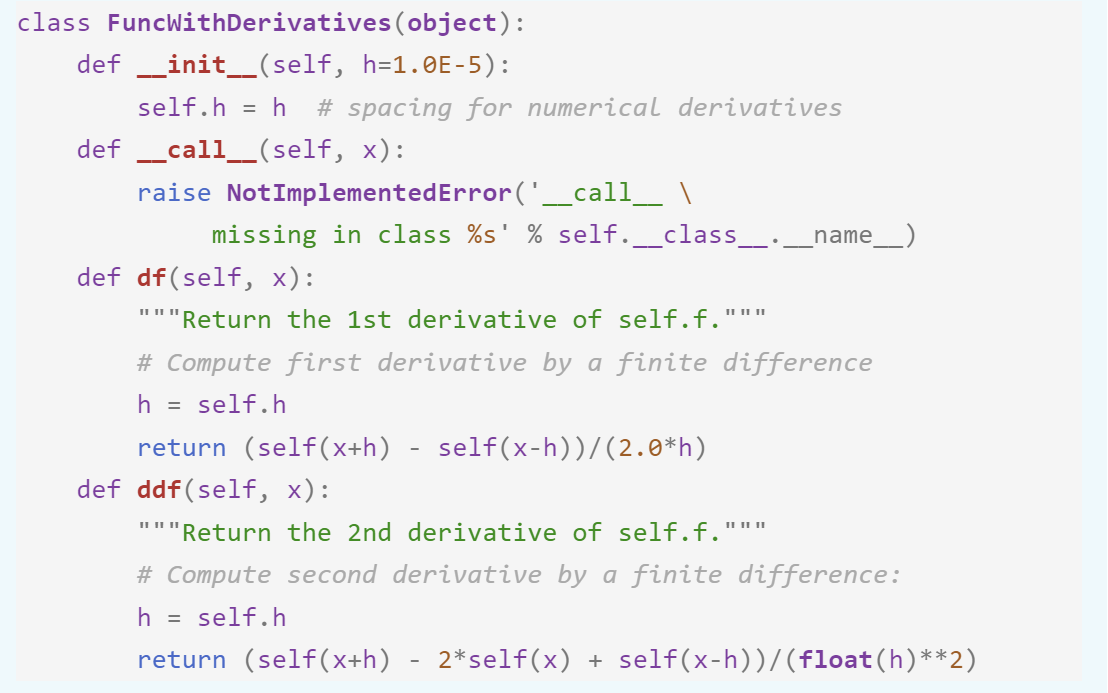

Make a subclass **Sine1** of class **FuncWithDerivatives** for defining an interface for the *sin(x)* function. Implement the function **\_\_call\_\_** only, and rely on the inherited **df** and **ddf** methods for computing the derivatives. Make another subclass **Sine2** for *sin(x)* where you also implement the **df** and **ddf** methods using analytical expressions for the derivatives. 

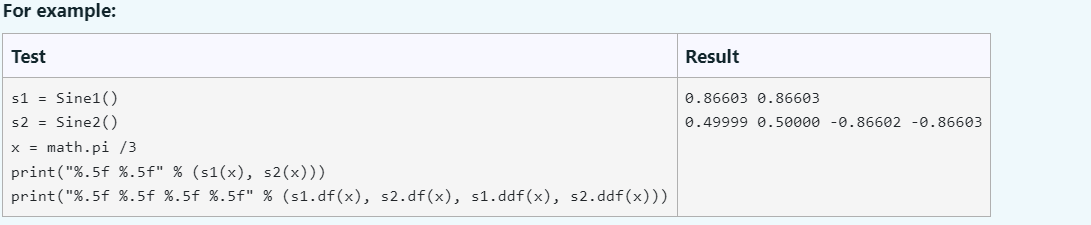

In [26]:
from Derivatives import *
class Sine1(FuncWithDerivatives):
    def __call__(self, x):
        return math.sin(x)
    
    
class Sine2(FuncWithDerivatives):
    def __call__(self, x):
        return math.sin(x)
    def df(self,x):
        return (math.cos(x))
    def ddf(self,x):
        return -math.sin(x)

s1 = Sine1()
s2 = Sine2(h=0.1)
x = math.pi /3
print("%.5f %.5f" % (s1(x), s2(x)))
print("%.5f %.5f %.5f %.5f" % (s1.df(x), s2.df(x), s1.ddf(x), s2.ddf(x)))


0.86603 0.86603
0.50000 0.50000 -0.86603 -0.86603


# Question 5:
Define a new class called **SquareMatrix**, which is a descendant of the class **Matrix** in the previous homework. Add the **\_\_pow\_\_** exponentiation operation that takes a natural power (including zero) to which you want to raise the matrix.

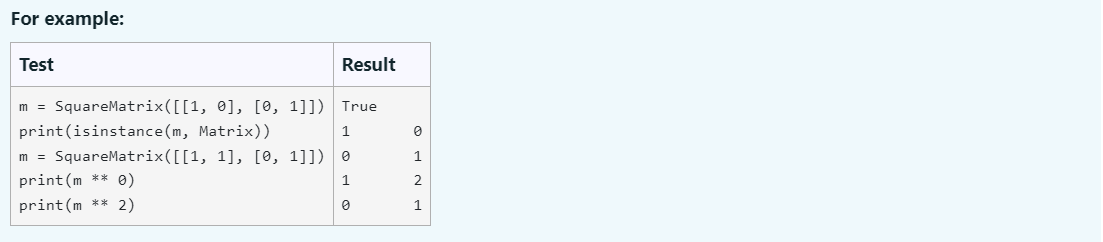

In [63]:

from typing import Any


class Matrix(object):
    def __init__(self, matrix):
        self.matrix=matrix
        self.result=[[0 for j in range(len(matrix[0]))]for i in range(len(matrix))]

    def __str__(self) -> str:
        res=''
        for i in range(len(self.matrix)-1):
            res+='\t'.join(list(map(str,self.matrix[i])))+'\n'
        res+='\t'.join(list(map(str,self.matrix[-1])))
        return res
    def size(self):
        return len(self.matrix),len(self.matrix[0])
    def __add__(self,other):
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                self.result[i][j]=self.matrix[i][j]+other.matrix[i][j]
        return Matrix(self.result)
    def __mul__(self,num):
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                self.result[i][j]=self.matrix[i][j]*num
        return Matrix(self.result)
    def __rmul__(self,num):
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                self.result[i][j]=self.matrix[i][j]*num    
        return Matrix(self.result)
    def solve(self, b):
        n = len(self.matrix)
        M = [row[:] + [right] for row, right in zip(self.matrix, b)]

        for i in range(n):
            pivot_value = M[i][i]
            assert pivot_value != 0, 'Matrix is singular'
            M[i] = [x / pivot_value for x in M[i]]

            for j in range(n):
                if i == j:
                    continue
                ratio = M[j][i]
                M[j] = [x - ratio * y for x, y in zip(M[j], M[i])]

        x = [M[i][-1] for i in range(n)]
        return ' '.join(['{:.2f}'.format(i) for i in x])      
       

In [84]:
class SquareMatrix(Matrix):
    def matrix_power(self, power):
        a=self.matrix
        rows, columns = len(a), len(a[0])
        result = [[0 for j in range(columns)] for i in range(rows)]
        b = a
        if power==0:
            temp=result
            for i in range(rows):
                temp[i][i]=1
            return SquareMatrix(temp)
        if power==1:
            return SquareMatrix(self.matrix)
        for step in range(1, power):
            result = [[0 for j in range(columns)] for i in range(rows)]
            for i in range(0, rows):
                for j in range(0, columns):
                    for m in range(0, rows):
                        result[i][j] += a[i][m] * b[m][j]
            a = result
        return SquareMatrix(result)
b=SquareMatrix([[1,2],[3,4]])


print(b.matrix_power(1))

1	2
3	4
